**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 12**

**Problem 12.10**


**Given the QE of a silicon test cell and a calibrated cell, obtain their respective SR and calculate the Spectral Mismatch Factor, when the test cell is measured using a Xe-arc lamp, relative to the reference spectrum AM1.5G.**

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data for the solar spectra.

In [56]:
reference = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
reference

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [57]:
reference.drop(reference.index[0], inplace=True)   # remove row including information on units
reference=reference.astype(float)                  # convert values to float for easy operation
reference.index=reference.index.astype(float)      # convert indexes to float for easy operation

We import the data for the Xe-arc lamp.

In [58]:
xe_arc = pd.read_csv('data/Xe lamp spectral irradiance.csv', index_col=0, header=0) 
xe_arc

,Xe arc lamp (W*m-2*nm-1)
wavelength (nm),
300.36966,0.000793
300.58005,0.000816
300.79044,0.000837
301.00082,0.000858
301.21124,0.000876
...,...
1199.77246,0.213920
1199.84302,0.213600
1199.91345,0.213280


We can also plot the AM1.5G spectra and the Xe-arc lamp spectra.

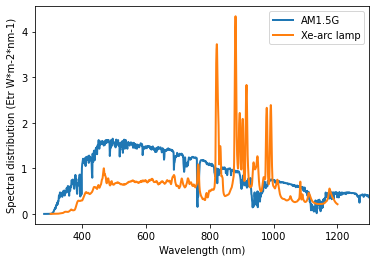

In [59]:
plt.plot(reference['AM1.5G'], 
         linewidth=2, label='AM1.5G')
plt.plot(xe_arc, 
         linewidth=2, label='Xe-arc lamp')
plt.ylabel('Spectral distribution (Etr W*m-2*nm-1)')
plt.xlabel('Wavelength (nm)')
plt.xlim([250,1300])
plt.legend()

We define the relevant constants and retrieve the QE of the silicon solar cell (device under test), and the callibrated cell.

In [60]:
h=6.63*10**(-34)   # [J·s] Planck constant
e=1.60*10**(-19)   # [C] electron charge
c =299792458       #[m/s] Light speed

In [61]:
QE_dut = pd.read_csv('data/QE_DUT.csv', index_col=0, header=0) 
QE_cal= pd.read_csv('data/QE_calibrated_cell.csv', index_col=0, header=0) 

We calculate the Spectral Response (SR) of both cells and plot them. 

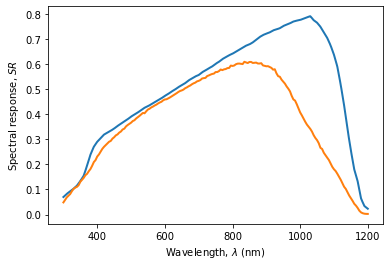

In [62]:
SR_dut=pd.Series(index=QE_dut.index,
            data=[QE_dut.loc[i,'QE']*e*i*0.000000001/(h*c) for i in QE_dut.index])
SR_cal=pd.Series(index=QE_cal.index,
            data=[QE_cal.loc[i,'QE']*e*i*0.000000001/(h*c) for i in QE_cal.index])
plt.plot(SR_DUT, 
         linewidth=2)
plt.plot(SR_cal, 
         linewidth=2)
plt.ylabel('Spectral response, $SR$')
plt.xlabel(r'Wavelength, $\lambda$ (nm)');

For every spectra and solar cell, we interpolate the spectrum at those datapoints included in the SR, and integrate to obtain the short-circuit current density using Eq. 3.5.

$J_{L, spectrum, cell}=\int SR(\lambda) \cdot G(\lambda) \ d\lambda$


In [63]:
spectra=xe_arc['Xe arc lamp (W*m-2*nm-1)']
spectra_interpolated=np.interp(SR_dut.index, spectra.index, spectra.values)
J_sim_dut = np.trapz([x*y for x,y in zip(SR_dut, spectra_interpolated)], x=SR_dut.index)*1000/10000 # A-> mA ; m2 -> cm2
spectra_interpolated=np.interp(SR_cal.index, spectra.index, spectra.values)
J_sim_cal = np.trapz([x*y for x,y in zip(SR_cal, spectra_interpolated)], x=SR_cal.index)*1000/10000 # A-> mA ; m2 -> cm2

spectra=reference['AM1.5G']
spectra_interpolated=np.interp(SR_dut.index, spectra.index, spectra.values)
J_ref_dut =np.trapz([x*y for x,y in zip(SR_dut, spectra_interpolated)], x=SR_dut.index)*1000/10000 # A-> mA ; m2 -> cm2

spectra_interpolated=np.interp(SR_cal.index, spectra.index, spectra.values)
J_ref_cal =np.trapz([x*y for x,y in zip(SR_cal, spectra_interpolated)], x=SR_cal.index)*1000/10000 # A-> mA ; m2 -> cm2

We calculate the Spectral Mismatch Factor $M_f$ using Eq. 12.3

$M_f=\frac{J_{L, sim, dut}}{J_{L, ref, dut}}\frac{J_{L, ref, cal}}{J_{L, sim, cal}}$


In [64]:
M_f=J_sim_dut/J_ref_dut*J_ref_cal/J_sim_cal
print('Spectral Mismatch Factor = ' + str(M_f.round(3)))

Spectral Mismatch Factor = 1.043
